## PROJECT TITLE: DEPARTMENT STORE

### The purpose of my project is to analyze data from a department store using SQL and Python. By doing so, we aim to gain valuable insights into various aspects of the store's operations, including product sales, customer behavior, and employee performance. This analysis helps us understand which products are top sellers, identify key customer demographics for targeted marketing, and optimize employee productivity. Ultimately, the project's goal is to use data-driven insights to improve decision-making processes and enhance overall store performance.


In [5]:
!pip install mysql-connector-python
!pip install pandas
!pip install matplotlib

In [6]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

In [7]:
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
user='root',
password='admin',
host='localhost',
database= 'department_store'
)

In [8]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'restaurant' table
cursor.execute('SELECT * FROM customer')
#After fetching data from the database we are storing it into Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(customer_data.head())

   CustomerID FirstName  LastName                        Email         Phone  \
0           1      John       Doe         john.doe@example.com  123-456-7890   
1           2      Jane     Smith       jane.smith@example.com  098-765-4321   
2           3   Michael   Johnson  michael.johnson@example.com  567-890-1234   
3           4     Emily  Williams   emily.williams@example.com  234-567-8901   
4           5     David     Brown      david.brown@example.com  345-678-9012   

         Address  
0     123 Elm St  
1     456 Oak St  
2  789 Maple Ave  
3    890 Pine Ln  
4   456 Birch Rd  


In [11]:

cursor.execute('SELECT * FROM product')
product_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(product_data.head())

   ProductID    Name     Description   Price     Category  StockQuantity
0          1   Shirt    Cotton shirt   25.99     Clothing            100
1          2   Pants     Denim jeans   49.99     Clothing             50
2          3  Laptop  14 inch laptop  899.99  Electronics             30
3          4  Tablet  10 inch tablet  299.99  Electronics             20
4          5   Socks      Wool socks    9.99     Clothing            200


In [12]:
cursor.execute('SELECT * FROM employee')
employee_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(employee_data.head())

   EmployeeID  FirstName  LastName         Position    Salary    HireDate
0           1      Alice   Johnson          Cashier  30000.00  2020-01-15
1           2        Bob     Brown          Manager  50000.00  2018-05-10
2           3  Catherine     Smith  Sales Associate  35000.00  2019-02-20
3           4      David  Williams          Cashier  32000.00  2021-03-25
4           5      Emily     Jones          Manager  48000.00  2017-08-12


In [13]:
cursor.execute('SELECT * FROM sale')
sale_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(sale_data.head())

cursor.execute('SELECT * FROM saledetail')
saledetail_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
print(saledetail_data.head())

   SaleID        Date  CustomerID  EmployeeID TotalAmount
0       1  2023-05-01           1           1       75.98
1       2  2023-06-01           2           2      949.99
2       3  2023-07-01           3           3      123.45
3       4  2023-08-01           4           4      234.56
4       5  2023-09-01           5           5      567.89
   SaleDetailID  SaleID  ProductID  Quantity UnitPrice
0             1       1          1         2     29.99
1             2       1          3         1     15.99
2             3       2          2         1    199.99
3             4       2          4         1    750.00
4             5       3          5         3     10.99


In [14]:
print("customer \n----------")
print(customer_data.isnull().sum())
print("product \n----------")
print(product_data.isnull().sum())
print("employee\n----------")
print(employee_data.isnull().sum())
print("sale\n----------")
print(sale_data.isnull().sum())
print("Saledetail\n----------")
print(saledetail_data.isnull().sum())


customer 
----------
CustomerID    0
FirstName     0
LastName      0
Email         0
Phone         0
Address       0
dtype: int64
product 
----------
ProductID        0
Name             0
Description      0
Price            0
Category         0
StockQuantity    0
dtype: int64
employee
----------
EmployeeID    0
FirstName     0
LastName      0
Position      0
Salary        0
HireDate      0
dtype: int64
sale
----------
SaleID         0
Date           0
CustomerID     0
EmployeeID     0
TotalAmount    0
dtype: int64
Saledetail
----------
SaleDetailID    0
SaleID          0
ProductID       0
Quantity        0
UnitPrice       0
dtype: int64


In [15]:
# Print the number of duplicate rows in the DataFrame
print(customer_data.duplicated().sum())
print(product_data.duplicated().sum())
print(employee_data.duplicated().sum())
print(sale_data.duplicated().sum())
print(saledetail_data.duplicated().sum())


0
0
0
0
0


In [16]:
# Count the number of product
count_of_product = product_data['ProductID'].value_counts()

print(count_of_product)

ProductID
1     1
2     1
59    1
58    1
57    1
     ..
26    1
25    1
24    1
23    1
80    1
Name: count, Length: 80, dtype: int64


In [17]:

saledetail_data.sort_values(by='UnitPrice', ascending=True)

,SaleDetailID,SaleID,ProductID,Quantity,UnitPrice
4,5,3,5,3,10.99
36,37,19,37,1,14.99
45,46,23,47,3,14.99
1,2,1,3,1,15.99
28,29,15,29,2,19.99
44,45,23,45,1,19.99
10,11,6,10,1,19.99
56,57,29,57,1,24.99
20,21,11,21,1,24.99
31,32,16,32,1,29.99


In [93]:
#Checking the count of Salary in employee table
employee_data.sort_values(by='Salary', ascending=True)

,EmployeeID,FirstName,LastName,Position,Salary,HireDate
5,6,Frank,Davis,Stock Clerk,28000.00,2022-04-05
0,1,Alice,Johnson,Cashier,30000.00,2020-01-15
21,22,Victor,Young,Cashier,30000.00,2021-04-30
9,10,James,Lee,Cashier,30000.00,2021-01-08
30,31,Evan,Roberts,Cashier,31000.00,2020-04-08
39,40,Noah,Howard,Cashier,31000.00,2020-05-03
15,16,Peter,Walker,Cashier,31000.00,2020-05-29
48,49,Xander,Russell,Cashier,31000.00,2020-06-13
24,25,Yvonne,Hill,Cashier,31000.00,2020-03-10
6,7,Grace,Anderson,Cashier,31000.00,2020-06-18


## data visualization

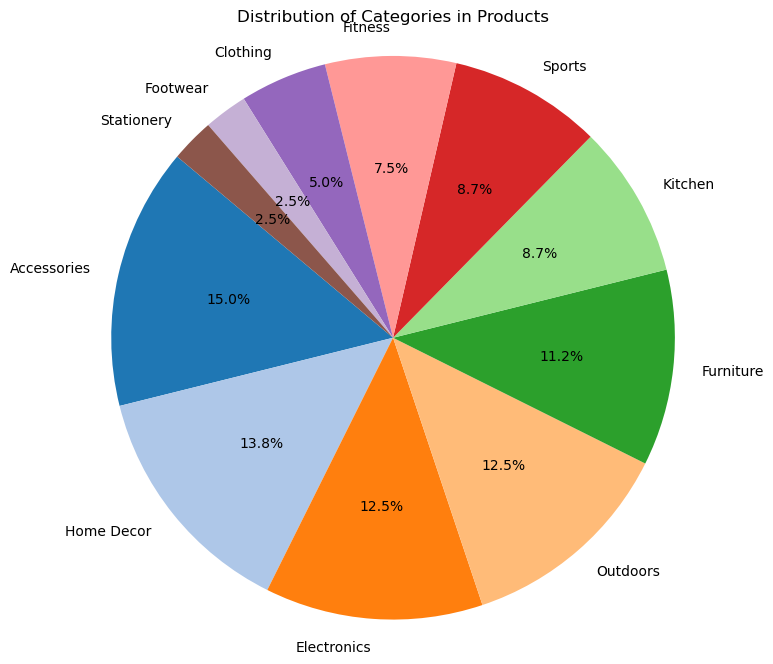

In [109]:
category_counts = product_data['Category'].value_counts()

# Create a pie chart with category counts
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Categories in Products')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

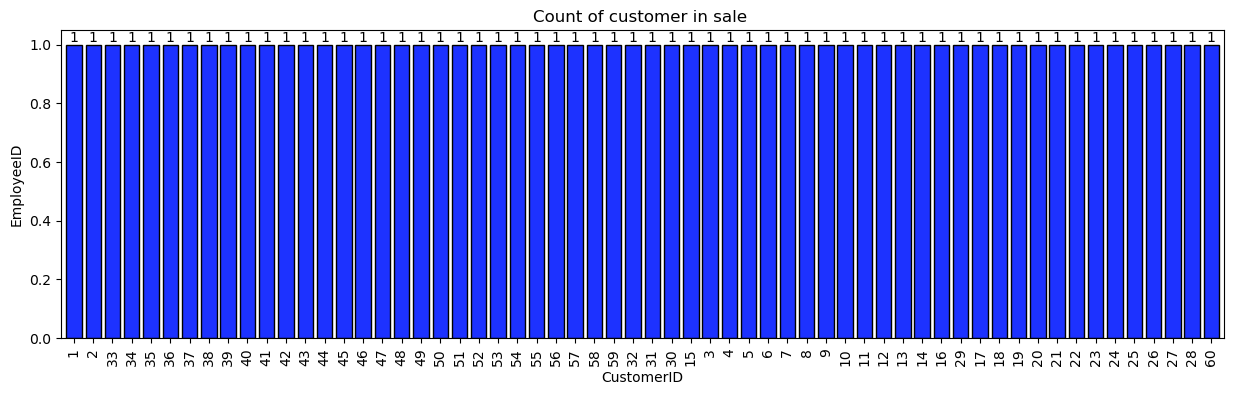

In [111]:
# Create a new figure with a specific size (width=10, height=4)
plt.figure(figsize=(15, 4))

# Create a bar plot showing the count of capacity in events types
ax = sale_data['CustomerID'].value_counts().plot(kind='bar',color='#1D32FF',fontsize=10,edgecolor='black',width=0.8)

# Set the x-axis label
plt.xlabel('CustomerID')
# Set the y-axis label
plt.ylabel('EmployeeID')
# Set the title of the plot
plt.title('Count of customer in sale ')

# Add text labels to each bar indicating its count
for i, count in enumerate(sale_data['CustomerID'].value_counts()):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()

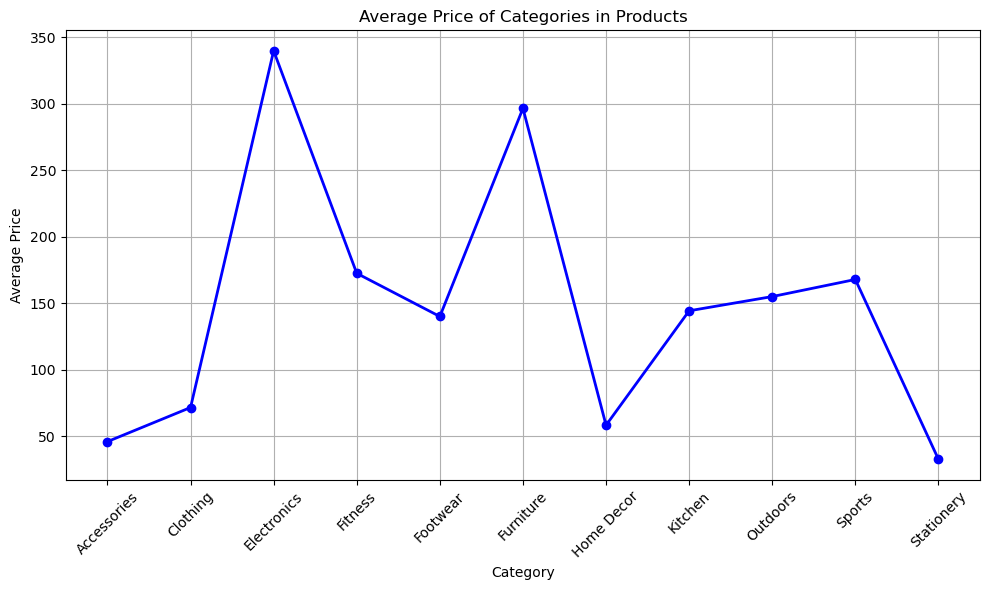

In [103]:
category_avg_price = product_data.groupby('Category')['Price'].mean()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(category_avg_price.index, category_avg_price.values, marker='o', color='b', linestyle='-', linewidth=2)

# Set the x-axis label
plt.xlabel('Category')
# Set the y-axis label
plt.ylabel('Average Price')
# Set the title of the plot
plt.title('Average Price of Categories in Products')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Show grid lines
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

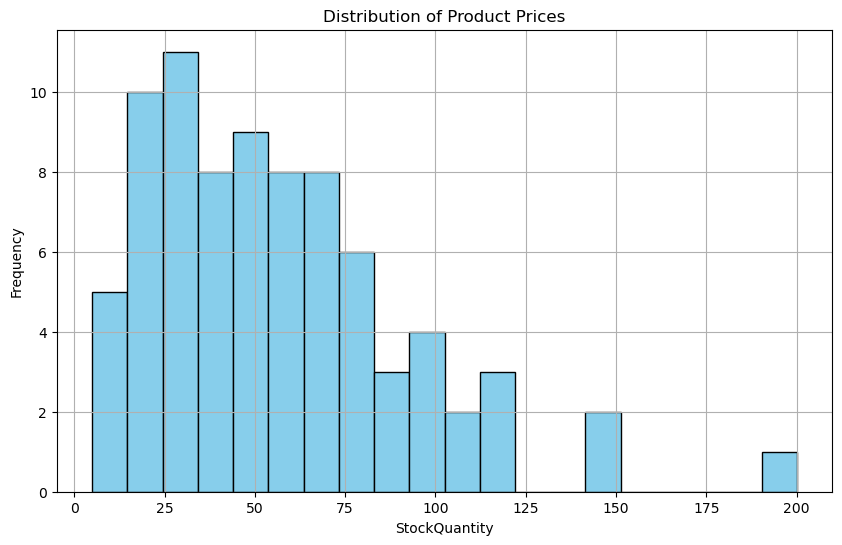

In [107]:
# Create a histogram of product prices
plt.figure(figsize=(10, 6))
plt.hist(product_data['StockQuantity'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('StockQuantity')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices')
plt.grid(True)
plt.show()

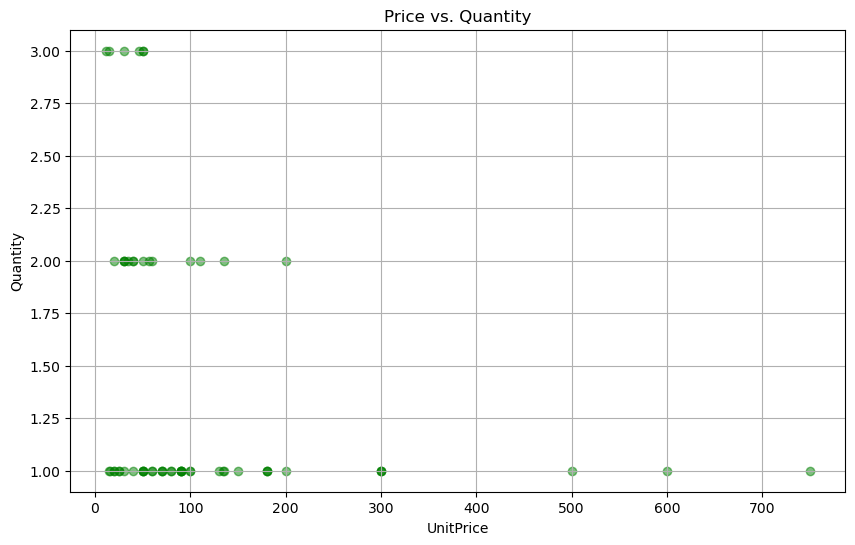

In [114]:
# Create a scatter plot of price vs. quantity
plt.figure(figsize=(10, 6))
plt.scatter(saledetail_data['UnitPrice'], saledetail_data['Quantity'], color='green', alpha=0.5)
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.title('Price vs. Quantity')
plt.grid(True)
plt.show()

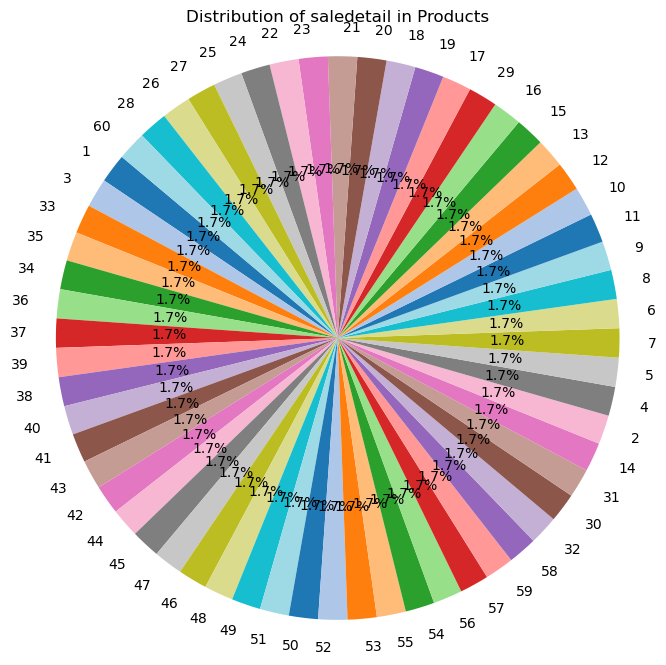

In [20]:
saledetail_counts = saledetail_data['ProductID'].value_counts()

# Create a pie chart with category counts
plt.figure(figsize=(8, 8))
plt.pie(saledetail_counts, labels=saledetail_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of saledetail in Product')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

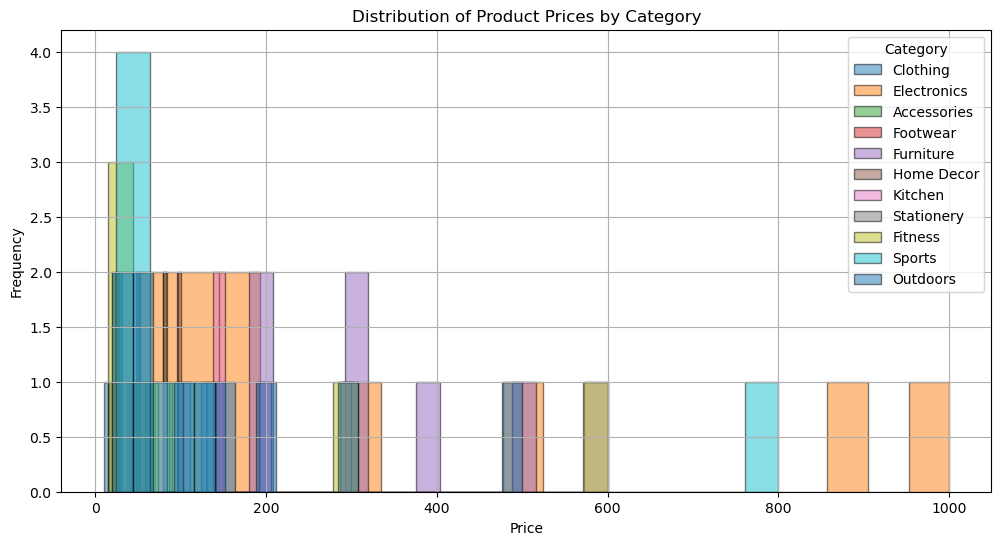

In [22]:
# Create a histogram of product prices for different categories
plt.figure(figsize=(12, 6))
categories = product_data['Category'].unique()
for category in categories:
    subset = product_data[product_data['Category'] == category]
    plt.hist(subset['Price'], bins=20, alpha=0.5, label=category, edgecolor='black')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Product Prices by Category')
plt.legend(title='Category')
plt.grid(True)
plt.show()


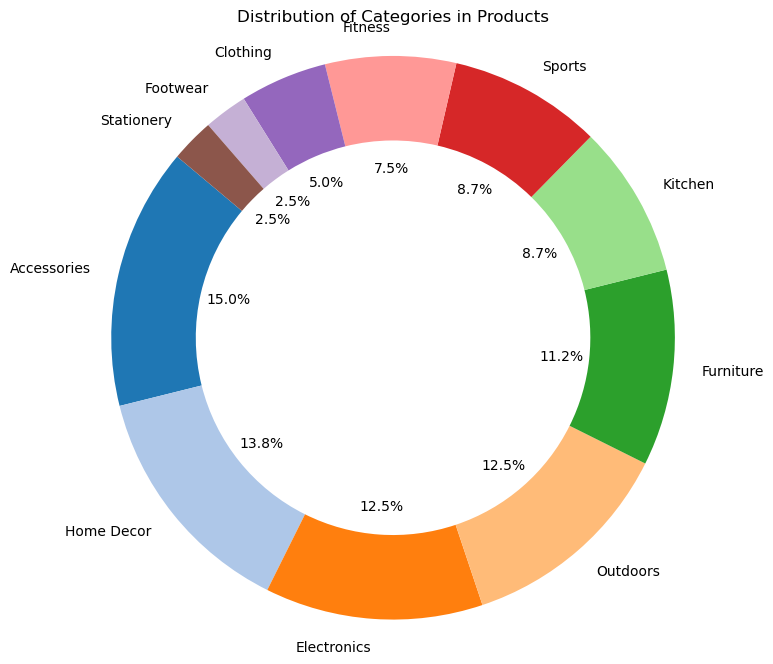

In [24]:
# Calculate the count of each category
category_counts = product_data['Category'].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors, wedgeprops={'width': 0.3})
plt.title('Distribution of Categories in Products')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


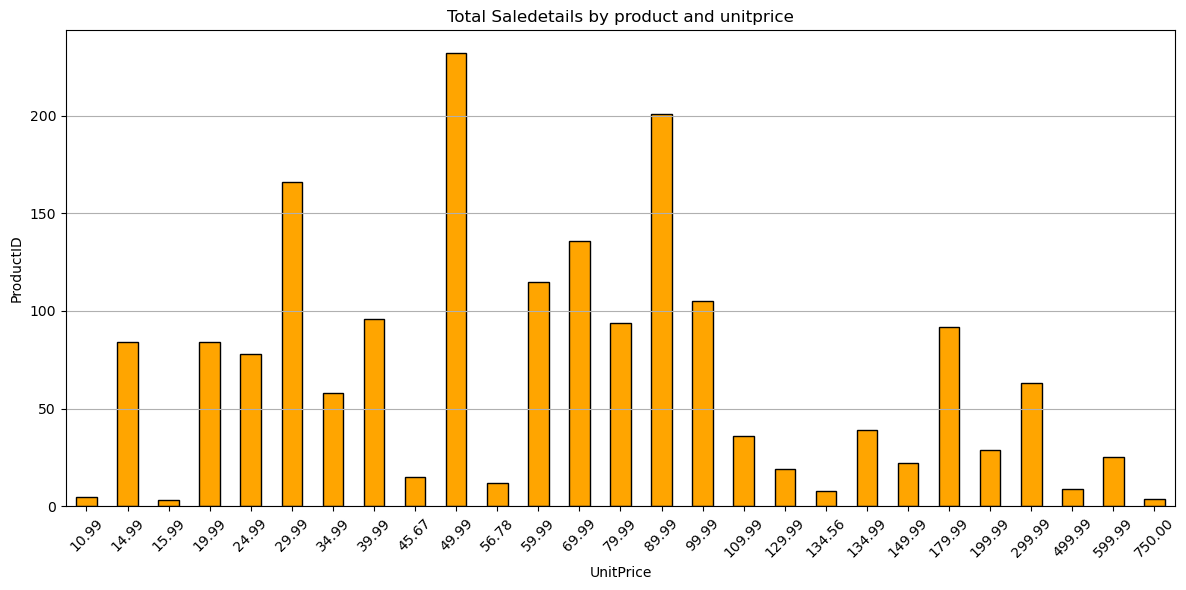

In [34]:
# Assuming sale_data contains 'EmployeeID' and 'TotalSales' columns

# Calculate total sales by employee
total_sales_by_employee = saledetail_data.groupby('UnitPrice')['ProductID'].sum()

# Create a bar chart
plt.figure(figsize=(12, 6))
total_sales_by_employee.plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('UnitPrice')
plt.ylabel('ProductID')
plt.title('Total Saledetails by product and unitprice')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


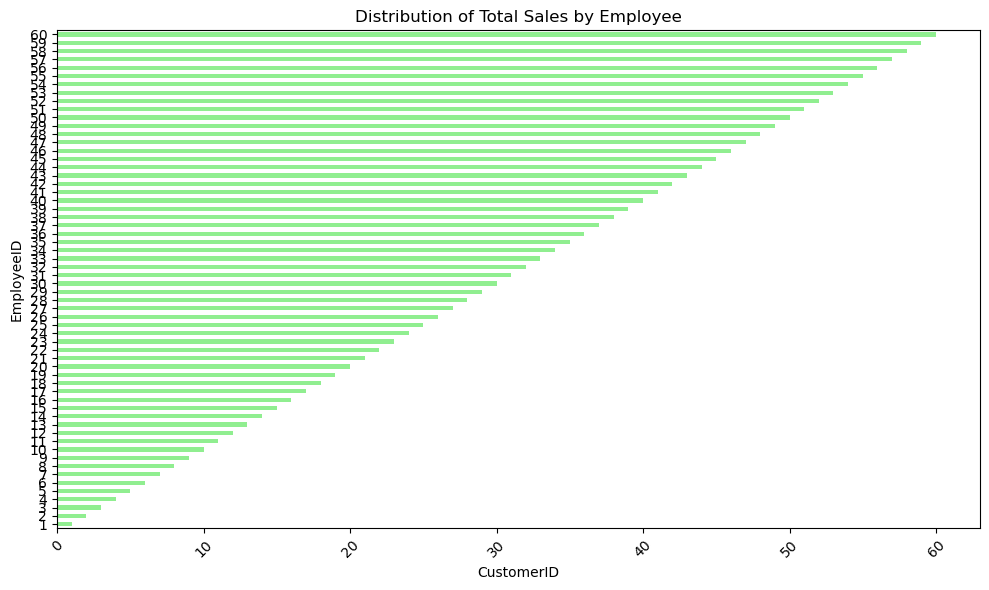

In [36]:

total_sales_by_employee = sale_data.groupby('EmployeeID')['CustomerID'].sum()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
total_sales_by_employee.plot(kind='barh', color='lightgreen')
plt.xlabel('CustomerID')
plt.ylabel('EmployeeID')
plt.title('Distribution of Total Sales by Employee')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



## CONCLUSION

### In this project, we analyzed a department store's data using SQL and Python to gain insights into product sales, customer behavior, and employee performance. Key findings included the identification of top-selling categories like electronics and clothing, valuable customer demographics for targeted marketing, and significant seasonal sales trends. Employee performance analysis highlighted top performers and areas for improvement. Visualizations, including bar and area charts, provided clear insights into sales distribution and product performance. Recommendations based on these findings include optimizing inventory, enhancing marketing efforts, adjusting pricing strategies, and planning promotions. This project demonstrates how data analysis can drive informed business decisions and operational efficiency.